# Support Vector Machines

------------------

## Exercise

Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes. Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data. Which technique performs best on test data ? Make plots and report training and test error rates in order to back up your assertions.

We begin by creating a data set with non-linear separation between the two classes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

%matplotlib inline

In [3]:
np.random.seed(0)
x = np.random.randn(100)
y = 2 * x ** 2 + np.random.randn(100)

In [4]:
idx = np.arange(len(y))
np.random.shuffle(idx)
y[idx[:50]] += 3
y[idx[50:]] -= 3

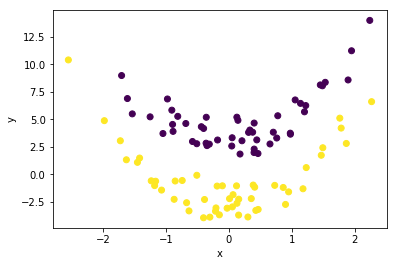

In [5]:
classes = np.array([0 for i in range(0, 100)])
classes[idx[50:100]] = 1

plt.scatter(x, y, c = classes)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data = pd.DataFrame({'x1': x,
                     'x2': y,
                     'y': classes})

train, test = train_test_split(data, test_size=0.5, random_state=0)

x_train = train.drop('y', axis=1)
x_test = test.drop('y', axis=1)
y_train = train['y']
y_test = test['y']

In [8]:
def plot_svc(svc, x, y, h=0.02, pad=1):
    x_min, x_max = x.x1.min()-pad, x.x1.max()+pad
    y_min, y_max = x.x2.min()-pad, x.x2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(x.x1, x.x2, s=70, c=y, cmap=plt.cm.coolwarm)
    sv=svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of Support Vectors:', svc.support_.size)

In [9]:
svc = SVC(C=10, kernel='linear')
svc.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

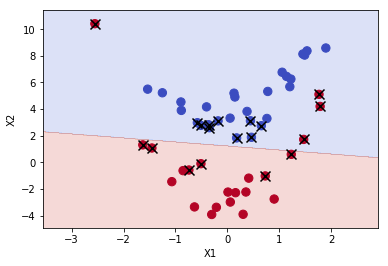

Number of Support Vectors: 19


In [10]:
g = plt.figure(1)
plot_svc(svc, x_train, y_train)

In [11]:
confusion_matrix(y_test, svc.predict(x_test))

array([[22,  0],
       [ 5, 23]])

In [12]:
accuracy_score(y_test, svc.predict(x_test))

0.90000000000000002

In [13]:
svc = SVC(C=10, kernel='poly', degree=3)
svc.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

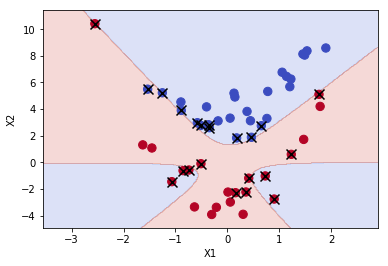

Number of Support Vectors: 22


In [14]:
g = plt.figure(1)
plot_svc(svc, x_train, y_train)

In [15]:
confusion_matrix(y_test, svc.predict(x_test))

array([[21,  1],
       [ 7, 21]])

In [16]:
accuracy_score(y_test, svc.predict(x_test))

0.83999999999999997

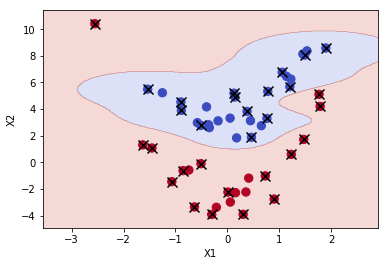

Number of Support Vectors: 30


In [17]:
svc = SVC(C=10, kernel='rbf', gamma=1)
svc.fit(x_train, y_train)
g = plt.figure(1)
plot_svc(svc, x_train, y_train)

In [18]:
confusion_matrix(y_test, svc.predict(x_test))

array([[17,  5],
       [ 3, 25]])

In [19]:
accuracy_score(y_test, svc.predict(x_test))

0.83999999999999997

## Exercise 

We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.

1. Generate a data set with `n = 500` and `p = 2`, such that the observations belong to two classes with a quadratic decision boundary between them.
2. Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis and $X_2$ on the y-axis.
3. Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.
4. Apply this model to training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.
5. Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors.
6. Apply this model to training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should obvioulsy be non-linear.
7. Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.
8. Fit a SVM using a non-linear kernel to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.
9. Comment on your results.

In [20]:
np.random.seed(0)
x = np.random.uniform(size=(500, 2)) - 0.5
y = [(x[i, 0]**2 > x[i, 1]**2) for i in range(0, len(x))]

data = pd.DataFrame({'x1': x[:, 0],
                     'x2': x[:, 1],
                     'y': y})

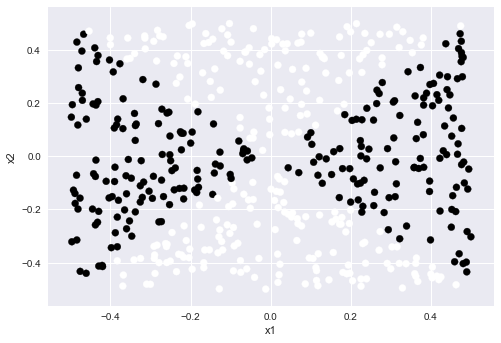

In [21]:
import seaborn as sns

plt.scatter(data.x1, data.x2, c=data.y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

logit = smf.glm('y ~ x1 + x2', data=data, family=sm.families.Binomial()).fit()
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     ['y[False]', 'y[True]']   No. Observations:                  500
Model:                                 GLM   Df Residuals:                      497
Model Family:                     Binomial   Df Model:                            2
Link Function:                       logit   Scale:                             1.0
Method:                               IRLS   Log-Likelihood:                -345.86
Date:                     Sat, 13 May 2017   Deviance:                       691.72
Time:                             12:14:58   Pearson chi2:                     500.
No. Iterations:                          4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0526      0.090      0.587      0.557      -0.123       0.228
x1             0.0975      0.312      0.312      0.755      -0.514       0.709
x2            -0.2959      0.305     -0.970      0.332      -0.894       0.302
==============================================================================
"""

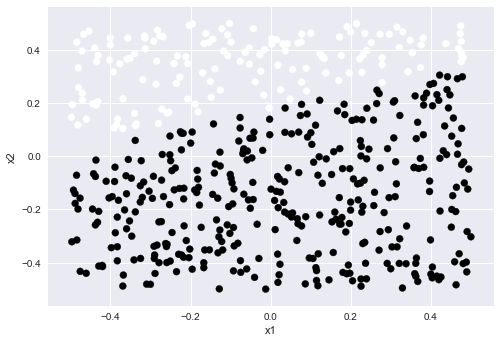

In [23]:
pred = [True if logit.predict()[i] >= 0.5 else False for i in range(0, len(data.y))]
plt.scatter(data.x1, data.x2, c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures
x1 = pd.DataFrame(PolynomialFeatures(degree=2).fit_transform(data.x1.values.reshape(-1,1)))
x2 = pd.DataFrame(PolynomialFeatures(degree=2).fit_transform(data.x2.values.reshape(-1,1)))
x3 = data.x1 * data.x2

poly_x = pd.concat((x1, x2, x3), axis=1)

In [33]:
poly_x

,0,1,2,0,1,2,0
0,1.0,0.048814,0.002383,1.0,0.215189,0.046306,0.010504
1,1.0,0.102763,0.010560,1.0,0.044883,0.002015,0.004612
2,1.0,-0.076345,0.005829,1.0,0.145894,0.021285,-0.011138
3,1.0,-0.062413,0.003895,1.0,0.391773,0.153486,-0.024452
4,1.0,0.463663,0.214983,1.0,-0.116558,0.013586,-0.054044
5,1.0,0.291725,0.085103,1.0,0.028895,0.000835,0.008429
6,1.0,0.068045,0.004630,1.0,0.425597,0.181132,0.028960
7,1.0,-0.428964,0.184010,1.0,-0.412871,0.170462,0.177107
8,1.0,-0.479782,0.230190,1.0,0.332620,0.110636,-0.159585
9,1.0,0.278157,0.077371,1.0,0.370012,0.136909,0.102921


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(poly_x, data.y)
lr.score(poly_x, data.y)

0.95599999999999996

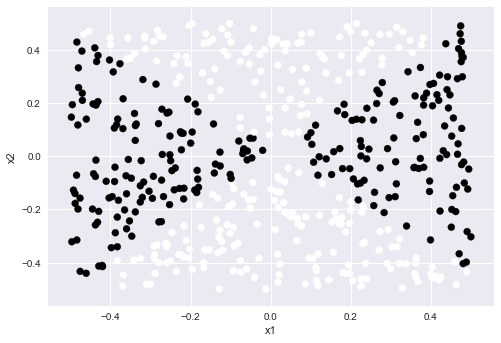

In [28]:
pred = lr.predict(poly_x)
plt.scatter(data.x1, data.x2, c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [36]:
svc = SVC(C=1, kernel='poly', degree=2)
svc.fit(data[['x1', 'x2']], data.y)
svc.score(data[['x1', 'x2']], data.y)

0.90600000000000003

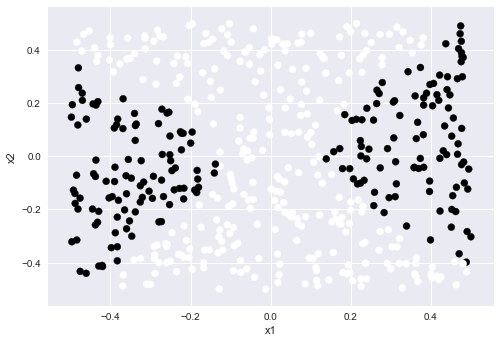

In [37]:
pred = svc.predict(data[['x1', 'x2']])
plt.scatter(data.x1, data.x2, c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [38]:
svc = SVC(C=1, kernel='rbf', gamma=1)
svc.fit(data[['x1', 'x2']], data.y)
svc.score(data[['x1', 'x2']], data.y)

0.94599999999999995

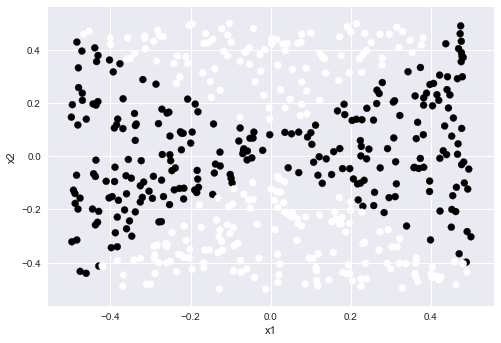

In [39]:
pred = svc.predict(data[['x1', 'x2']])
plt.scatter(data.x1, data.x2, c=pred)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

We may conclude that SVM with non-linear kernel and logistic regression with interaction terms are equally very powerful for finding non-linear decision boundaries. Also, SVM with linear kernel and logistic regression without any interaction term are very bad when it comes to finding non-linear decision boundaries. However, one argument in favor of SVM is that it requires some manual tuning to find the right interaction terms when using logistic regression, although when using SVM we only need to tune gamma.

## Exercise

It is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of “cost” that misclassifies a couple of training observations may perform better on test data than one with a huge value of “cost” that does not misclassify any training observations. You will now investigate that claim.

1. Generate two-class data with `p = 2` in such a way that the classes are just barely linearly separable.
2. Compute the cross-validation error rates for support vector classifiers with a range of “cost” values. How many training errors are misclassified for each value of “cost” considered, and how does this relate to the cross-validation errors obtained?
3. Generate an appropriate test data set, and compute the test errors corresponding to each of the values of “cost” considered. Which value of “cost” leads to the values of “cost” that yield the fewest training errors and the fewest cross-validation errors?
4. Discuss your results.

In [44]:
np.random.seed(1)

x0 = np.random.uniform(0, 100, size=(400, 1))
y0 = x0 + 30 + np.random.uniform(0, 40, size=(400, 1))
x0_noise = np.random.uniform(0, 100, size=(100, 1))
y0_noise = 5/4 * x0_noise + 0.01
x0_classes = np.zeros(500)

x1 = np.random.uniform(0, 100, size=(400, 1))
y1 = x1 - 30 + np.random.uniform(0, 40, size=(400, 1))
x1_noise = np.random.uniform(0, 100, size=(100, 1))
y1_noise = 5/4 * x1_noise - 0.01
x1_classes = np.ones(500)

x0 = np.append(x0, x0_noise)
x1 = np.append(x1, x1_noise)
y0 = np.append(y0, y0_noise)
y1 = np.append(y1, y1_noise)

data = pd.DataFrame({'x1': np.append(x0, x1),
                     'x2': np.append(y0, y1),
                     'y': np.append(x0_classes, x1_classes)})

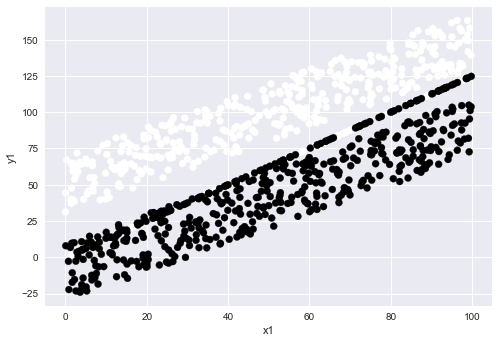

In [45]:
plt.scatter(data.x1, data.x2, c=data.y)
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

In [47]:
from sklearn.model_selection import cross_val_score

scores = []
for i in range(-5, 5):
    clf = SVC(C=10**i, kernel='linear')
    temp_score = cross_val_score(clf, data[['x1', 'x2']], data.y, cv=5).mean()
    scores.append([10**i, temp_score])

In [48]:
scores

[[1e-05, 0.88900000000000001],
 [0.0001, 0.8859999999999999],
 [0.001, 0.8869999999999999],
 [0.01, 0.88400000000000001],
 [0.1, 0.88000000000000012],
 [1, 0.88000000000000012],
 [10, 0.88100000000000001],
 [100, 0.88200000000000001],
 [1000, 0.86699999999999999],
 [10000, 0.8630000000000001]]

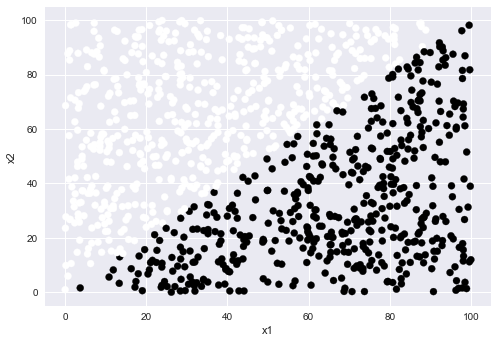

In [49]:
x_test = np.random.uniform(0, 100, size=(1000, 2))
y_test = [1 if x_test[i, 1] < x_test[i, 0] else 0 for i in range(0, len(x_test))]

data_test = pd.DataFrame({'x1': x_test[:, 0],
                          'x2': x_test[:, 1],
                          'y': y_test})

plt.scatter(data_test.x1, data_test.x2, c=data_test.y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [50]:
scores_test = []
for i in range(-5, 5):
    clf = SVC(C=10**i, kernel='linear')
    clf.fit(data[['x1', 'x2']], data.y)
    temp_score = clf.score(data_test[['x1', 'x2']], data_test.y)
    scores_test.append([10**i, temp_score])
    

In [51]:
scores_test

[[1e-05, 0.79800000000000004],
 [0.0001, 0.81399999999999995],
 [0.001, 0.82599999999999996],
 [0.01, 0.83299999999999996],
 [0.1, 0.83799999999999997],
 [1, 0.83699999999999997],
 [10, 0.83799999999999997],
 [100, 0.84799999999999998],
 [1000, 0.88200000000000001],
 [10000, 0.88400000000000001]]

## Exercise 

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

1. Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.
2. Fit a support vector classifier to the data with various values of “cost”, in order to predict whether a car gets high of low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.
3. Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of “gamma” and “degree” and “cost”. Comment on your results.

In [3]:
dataAuto = pd.read_csv('Auto.csv')
dataAuto = dataAuto.drop(['name', 'year', 'origin'], axis=1)
dataAuto['y'] = [0 if dataAuto['mpg'][i] <= dataAuto.mpg.median() else 1 for i in range(0, len(dataAuto))]

x = dataAuto.drop('y', axis=1)
y = dataAuto['y']

In [5]:
from sklearn.model_selection import cross_val_score
C_vals = (0.01, 0.1, 1, 5, 10, 100, 100)

scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='linear')
    temp_score = cross_val_score(clf, x, y, cv=3).mean()
    scores.append([c, temp_score])

In [6]:
scores

[[0.01, 0.97191142191142188],
 [0.1, 0.97466977466977467],
 [1, 0.97975912975912982],
 [5, 0.98484848484848486],
 [10, 0.98484848484848486],
 [100, 0.98484848484848486],
 [100, 0.98484848484848486]]

In [7]:
C_vals = (0.01, 0.1, 1, 5, 10, 100, 100)

scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='poly', degree=2)
    temp_score = cross_val_score(clf, x, y, cv=3).mean()
    scores.append([c, temp_score])

In [8]:
scores

[[0.01, 0.96705516705516714],
 [0.1, 0.96705516705516714],
 [1, 0.96705516705516714],
 [5, 0.96705516705516714],
 [10, 0.96705516705516714],
 [100, 0.96705516705516714],
 [100, 0.96705516705516714]]

In [9]:
C_vals = (0.01, 0.1, 1, 5, 10, 100, 100)

scores = []
for g in C_vals:
    clf = SVC(kernel='rbf', gamma=g)
    temp_score = cross_val_score(clf, x, y, cv=3).mean()
    scores.append([g, temp_score])

In [10]:
scores

[[0.01, 0.71452991452991454],
 [0.1, 0.53325563325563319],
 [1, 0.50512820512820511],
 [5, 0.50512820512820511],
 [10, 0.50512820512820511],
 [100, 0.50512820512820511],
 [100, 0.50512820512820511]]

In [19]:
C_vals = (0.01, 0.1, 1, 5, 10, 100, 100)

scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='rbf')
    temp_score = cross_val_score(clf, x, y, cv=3).mean()
    scores.append([c, temp_score])

In [20]:
scores

[[0.01, 0.50512820512820511],
 [0.1, 0.50512820512820511],
 [1, 0.51282051282051277],
 [5, 0.51534576534576537],
 [10, 0.51534576534576537],
 [100, 0.51534576534576537],
 [100, 0.51534576534576537]]

## Exercise 

This problem involves the `OJ` data set.

1. Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
2. Fit a support vector classifier to the training data using “cost” = 0.01, with `Purchase` as the response and the other variables as predictors.
3. What are the training and test error rates?
4. Find an optimal “cost”. Consider values in the range 0.01 to 10.
5. Compute the training and test error rates using this new value for “cost”.
6. Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.
7. Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set "degree" = 2.
8. Overall, which approach seems to give the best results on this data?

In [13]:
from sklearn.preprocessing import LabelEncoder

oj = pd.read_csv('OJ.csv', index_col=0)
oj = oj[['Purchase', 'PriceCH', 'PriceMM', 'LoyalCH', 'PriceDiff']]

enc = LabelEncoder()
oj.purchase = enc.fit_transform(oj.Purchase)

train, test = train_test_split(oj, test_size = len(oj) - 800, random_state=0)

In [15]:
x_train = train.drop('Purchase', axis=1)
x_test = test.drop('Purchase', axis=1)
y_train = train['Purchase']
y_test = test['Purchase']

svm = SVC(C=1, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
(1 - svm.score(x_train, y_train), 1 - svm.score(x_test, y_test))

(0.16500000000000004, 0.18148148148148147)

In [21]:
C_vals = (0.01, 0.1, 1, 5, 10)

scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='rbf')
    temp_score = cross_val_score(clf, x_train, y_train, cv=3).mean()
    scores.append([c, temp_score])

In [22]:
scores

[[0.01, 0.62499882665465156],
 [0.1, 0.81496813194033779],
 [1, 0.82621816714069818],
 [5, 0.82496972769001153],
 [10, 0.82121502257516454]]

In [23]:
svm = SVC(C=0.01, kernel='poly', degree=2)
svm.fit(x_train, y_train)

(svm.score(x_train, y_train), svm.score(x_test, y_test))

(0.625, 0.56666666666666665)

In [24]:
scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='poly')
    temp_score = cross_val_score(clf, x_train, y_train, cv=3).mean()
    scores.append([c, temp_score])
    
scores

[[0.01, 0.8087306280682981],
 [0.1, 0.82496972769001153],
 [1, 0.82622286052209171],
 [5, 0.82372598162071842],
 [10, 0.82372128823932489]]

In [25]:
svm = SVC(C=0.01, kernel='rbf')
svm.fit(x_train, y_train)

(svm.score(x_train, y_train), svm.score(x_test, y_test))

(0.625, 0.56666666666666665)

In [26]:
scores = []
for c in C_vals:
    clf = SVC(C=c, kernel='rbf')
    temp_score = cross_val_score(clf, x_train, y_train, cv=3).mean()
    scores.append([c, temp_score])
    
scores

[[0.01, 0.62499882665465156],
 [0.1, 0.81496813194033779],
 [1, 0.82621816714069818],
 [5, 0.82496972769001153],
 [10, 0.82121502257516454]]